In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/content/IRIS.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

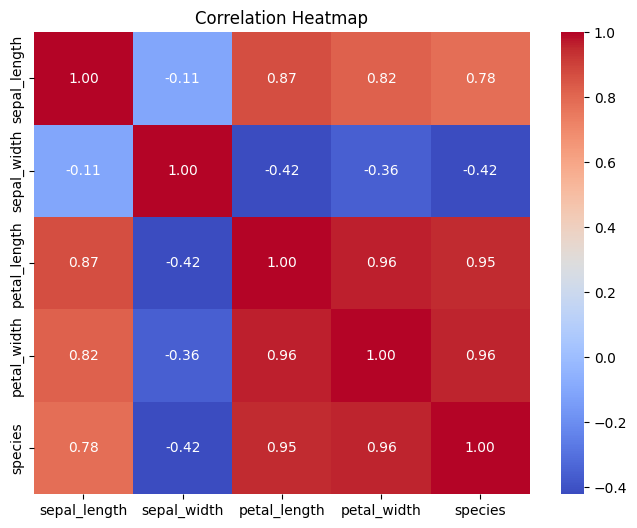

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

In [11]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
X = data.drop(columns='species',axis=1)
Y = data['species']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=3)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (105, 4) (45, 4)


In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train,Y_train)

LogisticRegression()

In [17]:
X_train_prediction  = model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy for training data is ',train_accuracy *100)

Accuracy for training data is  98.09523809523809


In [18]:
X_test_prediction  = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy for testing data is ',test_accuracy *100)

Accuracy for testing data is  93.33333333333333


In [19]:
input = [6.8,2.8,4.8,1.4]
in_np = np.asarray(input)
np_reshape = in_np.reshape(1,-1)
prediction  = model.predict(np_reshape)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
if(prediction == 0):
  print("The flower Iris is setosa")
elif(prediction == 1):
   print("The flower Iris is versicolor")
else:
   print("The flower Iris is virginica")

The flower Iris is versicolor


In [21]:
model2 = SVC(kernel='linear')

In [22]:
model2.fit(X_train,Y_train)

SVC(kernel='linear')

In [23]:
X_train_prediction  = model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy for training data is ',train_accuracy *100)

Accuracy for training data is  98.09523809523809


In [24]:
X_test_prediction  = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy for testing data is ',test_accuracy *100)

Accuracy for testing data is  93.33333333333333
